In [26]:
# Code to find the 8 most dominant colors of an image

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from sklearn.cluster import KMeans
%matplotlib inline

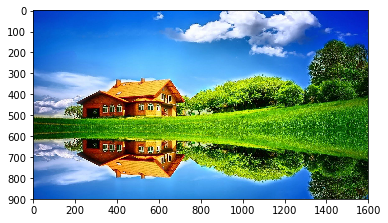

In [2]:
image = cv2.imread('test3_color_domination.jpg') #put the file path of the image here
im = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
plt.imshow(im)

In [3]:
imge = cv2.resize(im,(640,480)) # resizing the image to (480, 680)
print (imge.shape)

(480, 640, 3)


In [4]:
img_vect = imge.reshape(imge.shape[0]*imge.shape[1],imge.shape[2])
img_vect.shape

(307200, 3)

[[ 42  60 196]
 [167  91  20]
 [235 209 246]
 [ 60  39  15]
 [133  72 228]
 [231 153  44]
 [195 136 234]
 [118 208 244]]


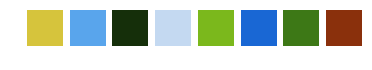

In [5]:
km = KMeans(n_clusters = 8)#, max_iter = 30)   #scikit learn library for implementing k-means
km.fit(img_vect)


colors = 255 - km.cluster_centers_.astype('uint8')
print (colors)  # centroids of the image 
plt.figure(0)

for cols in range(colors.shape[0]):
    cl = np.zeros((20, 20, 3))
    cl[:, :, :] = colors[cols]
    plt.subplot(1, colors.shape[0], cols+1)
    plt.axis('off') 
    plt.imshow(cl) # showing dominant colors
plt.show()

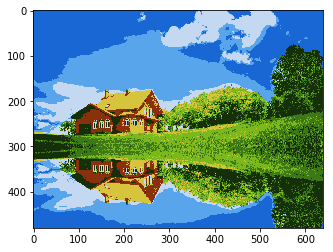

In [17]:
#showing the image with the dominant colors only

s = np.zeros((img_vect.shape))

for i in range (km.labels_.shape[0]) :
    s[i,:] = colors[int(km.labels_[i])]

r = s.reshape(imge.shape)
plt.imshow(r)

In [18]:
def dist(p1, p2) :
    return np.sqrt(((p1 - p2)**2).sum())

In [19]:
# Self designed code of k-means

def k_means (x_train, k, itter, def_clusters = None) :
    
    # initializing centroids
    
    if def_clusters == None :

        clusters = {}
        centre = np.random.uniform (x_train.min(), x_train.max(), (k ,x_train.shape[1])) 

        for i in range (k) :
            clusters[i] = {'center' : centre[i,:] , 'points' : [] }

    else :
        clusters = def_clusters
            
        
    while itter > 0 :
        
        labels = np.zeros(x_train.shape[0])
        
        for i in range (k) :
            clusters[i]['points'] = []
        
        for i in range (x_train.shape[0]) :
            r = []
            
            # finding the distances from centroid 
            for j in range (k) :
                r.append(dist(x_train[i , :] , clusters[j]['center']))
            
            r = np.asarray(r)
            t = r.argmin(axis = 0)
            labels[i] = t
            clusters[t]['points'].append(x_train[i,:]) 
            
            
        # find the centroid again
        
        for i in range (k) :
            
            points = np.asarray(clusters[i]['points'])
            
            if len(clusters[i]['points']) != 0 :
                clusters[i]['center'] = points.mean(axis = 0)
            
        itter = itter - 1
    
    return clusters,labels

In [22]:
clusters, labels = k_means((img_vect),8,30)

In [23]:
centre = []

for i in range (8) :
    a = list((clusters[i]['center']))#* img_vect.std()) + (img_vect.mean()))
    centre.append(a)

centre

[[22.569381147478094, 102.30097132071998, 212.85675704706225],
 [136.74304801670147, 46.800083507306887, 11.472818371607516],
 [117.76547182518895, 144.35912594477287, 178.11681508643269],
 [196.53653549746784, 217.3495643421094, 241.10867855682426],
 [189.3258804769828, 199.18975318912922, 44.961175818080974],
 [85.974191004097008, 149.35521328571741, 22.936134785180641],
 [83.649843024216494, 167.7159197312134, 242.89571667248057],
 [24.639210639210638, 57.027402402402402, 11.193032318032317]]

[[233 153  43]
 [119 209 244]
 [138 111  77]
 [ 59  38  14]
 [ 66  56 211]
 [170 106 233]
 [172  88  13]
 [231 198 244]]


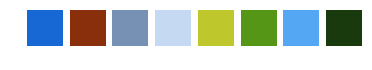

In [24]:
arr1 = np.array(centre).astype('int')

arr = 255 - arr1

print (arr)

for i in range (8) :
    zer = np.zeros([20,20,3])
    zer[ : , : , :] = arr[i]
    plt.subplot(1,8,i+1)
    plt.axis('off')
    plt.imshow(zer)

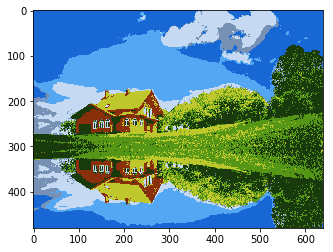

In [25]:
s = np.zeros((img_vect.shape))

for i in range (labels.shape[0]) :
    s[i,:] = arr[int(labels[i])]

r = s.reshape(imge.shape)
plt.imshow(r)